In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def plot_mnist(images, shape):
    fig = plt.figure()
    for j in range(1, len(images) + 1):
        ax = fig.add_subplot(shape[0], shape[1], j)
        ax.matshow(images[j - 1, 0, :, :], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./dataset', train=True, download=True, transform=transforms.ToTensor()), 
    batch_size=50, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./dataset', train=False, transform=transforms.ToTensor()), 
    batch_size=50, shuffle=True)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        self.x_flatten = x.view(-1, 28*28)
        self.h1 = F.sigmoid(self.fc1(self.x_flatten))
        self.h2 = F.sigmoid(self.fc2(self.h1))
        self.h3 = self.fc3(self.h2)
        self.out = F.softmax(self.h3, dim=1)
        return self.out

In [6]:
model = Net()

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
def train(epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    else:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.data[0]))

In [9]:
def test(log=None):
    test_loss = 0
    test_correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        test_correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_correct_percent = 100. * test_correct / len(test_loader.dataset)
    
    train_loss = 0
    train_correct = 0
    for data, target in train_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        train_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        train_correct += pred.eq(target.data.view_as(pred)).sum()
    train_loss /= len(train_loader.dataset)
    train_correct_percent = 100. * train_correct / len(train_loader.dataset)
    
    print('\nTest set:  Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, test_correct, len(test_loader.dataset), test_correct_percent))
    print('Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        train_loss, train_correct, len(train_loader.dataset), train_correct_percent))
    
    log['test'].append((test_loss, test_correct_percent))
    log['train'].append((train_loss, train_correct_percent))

In [10]:
err_log = {'test': [], 'train': []}

In [11]:
for epoch in range(1, 21):
    train(epoch)
    test(err_log)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304352
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.302630
Train Epoch: 1 [20000/60000 (33%)]	Loss: 2.302799
Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.301278
Train Epoch: 1 [40000/60000 (67%)]	Loss: 2.307832
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.300670
Train Epoch: 1 [59950/60000 (100%)]	Loss: 2.299811

Test set:  Average loss: 2.3011, Accuracy: 1135/10000 (11%)
Train set: Average loss: 2.3013, Accuracy: 6742/60000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.297959
Train Epoch: 2 [10000/60000 (17%)]	Loss: 2.296592
Train Epoch: 2 [20000/60000 (33%)]	Loss: 2.302118
Train Epoch: 2 [30000/60000 (50%)]	Loss: 2.300545
Train Epoch: 2 [40000/60000 (67%)]	Loss: 2.306026
Train Epoch: 2 [50000/60000 (83%)]	Loss: 2.300964
Train Epoch: 2 [59950/60000 (100%)]	Loss: 2.301340

Test set:  Average loss: 2.3009, Accuracy: 1135/10000 (11%)
Train set: Average loss: 2.3011, Accuracy: 6742/60000 (11%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.308301
Train Epoch: 3 [100

Train Epoch: 18 [40000/60000 (67%)]	Loss: 2.299129
Train Epoch: 18 [50000/60000 (83%)]	Loss: 2.274626
Train Epoch: 18 [59950/60000 (100%)]	Loss: 2.308540

Test set:  Average loss: 2.2899, Accuracy: 1135/10000 (11%)
Train set: Average loss: 2.2904, Accuracy: 6742/60000 (11%)

Train Epoch: 19 [0/60000 (0%)]	Loss: 2.273592
Train Epoch: 19 [10000/60000 (17%)]	Loss: 2.312196
Train Epoch: 19 [20000/60000 (33%)]	Loss: 2.279631
Train Epoch: 19 [30000/60000 (50%)]	Loss: 2.281460
Train Epoch: 19 [40000/60000 (67%)]	Loss: 2.259197
Train Epoch: 19 [50000/60000 (83%)]	Loss: 2.279205
Train Epoch: 19 [59950/60000 (100%)]	Loss: 2.267526

Test set:  Average loss: 2.2850, Accuracy: 1238/10000 (12%)
Train set: Average loss: 2.2855, Accuracy: 7342/60000 (12%)

Train Epoch: 20 [0/60000 (0%)]	Loss: 2.275949
Train Epoch: 20 [10000/60000 (17%)]	Loss: 2.283893
Train Epoch: 20 [20000/60000 (33%)]	Loss: 2.272383
Train Epoch: 20 [30000/60000 (50%)]	Loss: 2.274220
Train Epoch: 20 [40000/60000 (67%)]	Loss: 2.284245

In [12]:
for p in model.parameters():
    print(p.shape)

torch.Size([256, 784])
torch.Size([256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([10, 256])
torch.Size([10])


In [13]:
data, target = next(iter(train_loader))
vdata, vtarget = Variable(data), Variable(target)

In [14]:
optimizer.zero_grad()
output = model(vdata)
loss = F.cross_entropy(output, vtarget)
model.h3.retain_grad()
loss.backward()

In [15]:
t = target.numpy().reshape((-1, 10))
t

array([[3, 2, 8, 7, 1, 9, 2, 1, 0, 0],
       [7, 7, 5, 5, 6, 0, 5, 4, 1, 8],
       [3, 1, 0, 7, 3, 3, 6, 5, 0, 5],
       [1, 9, 1, 3, 1, 7, 0, 0, 9, 6],
       [8, 0, 4, 1, 2, 6, 2, 1, 9, 6]])

In [16]:
o = output.data.max(1, keepdim=True)[1].numpy().reshape((-1, 10))
o

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [17]:
(t == o).sum()

14

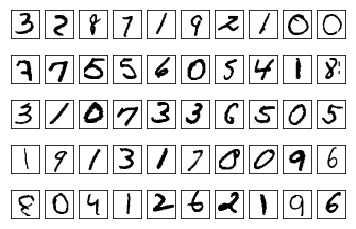

In [18]:
plot_mnist(data.numpy(), (5, 10))

In [19]:
model.h3

Variable containing:
 1.1859  1.7352 -0.3696  0.0087 -0.5800 -1.9873 -0.2655  0.5867 -0.7819 -0.2464
 1.2160  1.6156 -0.3550 -0.0131 -0.5726 -2.0014 -0.2614  0.6547 -0.7704 -0.2215
 1.0319  2.1112 -0.4085 -0.0579 -0.5975 -2.0155 -0.3043  0.5652 -0.8063 -0.2699
 1.0307  2.1189 -0.4149 -0.0579 -0.5979 -2.0232 -0.3117  0.6004 -0.8133 -0.2611
 0.9507  2.3607 -0.4152 -0.0720 -0.6143 -2.0207 -0.3277  0.5200 -0.8233 -0.2988
 1.1754  1.6866 -0.3817 -0.0237 -0.5623 -2.0066 -0.2647  0.6512 -0.7811 -0.2153
 1.1566  1.7970 -0.3712 -0.0227 -0.5744 -2.0095 -0.2734  0.6015 -0.7850 -0.2406
 0.9803  2.2692 -0.4125 -0.0674 -0.6075 -2.0232 -0.3207  0.5486 -0.8204 -0.2867
 1.3349  1.3869 -0.3412  0.0171 -0.5643 -1.9853 -0.2384  0.6528 -0.7607 -0.2152
 1.2665  1.5489 -0.3524  0.0065 -0.5702 -1.9920 -0.2541  0.6311 -0.7757 -0.2306
 1.1934  1.6091 -0.3619 -0.0125 -0.5603 -2.0016 -0.2613  0.6651 -0.7728 -0.2080
 1.3448  1.2360 -0.3551  0.0111 -0.5338 -2.0003 -0.2249  0.7473 -0.7607 -0.1642
 1.3782  1.2414 -0.

In [20]:
model.h3.grad

Variable containing:
1.00000e-03 *
  0.2840  0.6351  0.0440 -1.2653  0.0350  0.0081  0.0493  0.1313  0.0282  0.0503
  0.2282  0.4320 -0.9211  0.0441  0.0231  0.0051  0.0330  0.1025  0.0186  0.0345
  0.0349  0.4875 -0.0014 -0.0003 -0.0016 -0.0007 -0.0012  0.0089 -0.5249 -0.0012
  0.2949  1.2624  0.0600  0.0874  0.0496  0.0116  0.0668 -1.9428  0.0397  0.0705
  1.4398 -4.6431  0.3606  0.5095  0.2951  0.0720  0.3938  0.9276  0.2392  0.4054
  0.2336  0.5151  0.0332  0.0499  0.0272  0.0059  0.0379  0.1141  0.0214 -1.0383
  0.1721  0.5026 -0.8733  0.0343  0.0179  0.0038  0.0253  0.0768  0.0141  0.0263
  1.4802 -4.7104  0.3599  0.5096  0.2958  0.0715  0.3947  0.9515  0.2388  0.4085
 -3.8700  1.5628  0.2529  0.3648  0.2016  0.0481  0.2809  0.7061  0.1652  0.2876
 -3.6609  1.6636  0.2197  0.3173  0.1760  0.0420  0.2429  0.6078  0.1429  0.2488
  0.6049  1.0110  0.1103  0.1590  0.0898  0.0208  0.1225 -2.3200  0.0722  0.1295
  0.8923  0.7839  0.1390  0.2035  0.1156  0.0261  0.1591 -2.5803  0.0916  

In [21]:
err_log

{'test': [(2.3011497482299803, 11.35),
  (2.3009042335510252, 11.35),
  (2.3007299072265623, 11.35),
  (2.3005343269348146, 11.35),
  (2.300391411590576, 11.35),
  (2.3001720718383787, 11.35),
  (2.3000031997680663, 11.35),
  (2.2997355308532716, 11.35),
  (2.2994571548461913, 11.35),
  (2.2991405227661135, 11.35),
  (2.298772526550293, 11.35),
  (2.2983113029479982, 11.35),
  (2.297758497619629, 11.35),
  (2.2970578010559084, 11.35),
  (2.296134774017334, 11.35),
  (2.2947861419677733, 11.35),
  (2.2928720359802246, 11.35),
  (2.2899325302124023, 11.35),
  (2.2849817405700685, 12.38),
  (2.276224890899658, 18.39)],
 'train': [(2.301340489959717, 11.236666666666666),
  (2.3010655972798664, 11.236666666666666),
  (2.3008697566986083, 11.236666666666666),
  (2.300699993769328, 11.236666666666666),
  (2.3005141279856365, 11.236666666666666),
  (2.300317647298177, 11.236666666666666),
  (2.3001240716298423, 11.236666666666666),
  (2.2998804392496743, 11.236666666666666),
  (2.2996225980122

In [22]:
plt.figure(figsize=(15, 15))

In [23]:
train_log = [z for z in zip(*err_log['train'])]
test_log = [z for z in zip(*err_log['test'])]

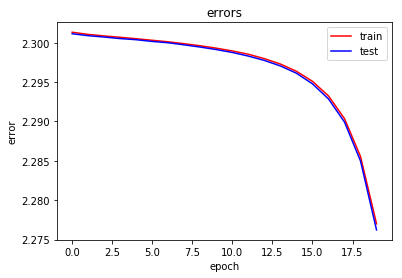

In [24]:
train_handler, = plt.plot(range(20), train_log[0], color='r', label='train')
test_handler, = plt.plot(range(20), test_log[0], color='b', label='test')
plt.title('errors')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend(handles=[train_handler, test_handler])
plt.show()

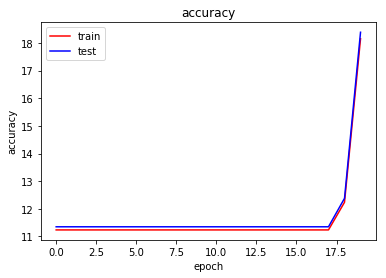

In [25]:
train_handler, = plt.plot(range(20), train_log[1], color='r', label='train')
test_handler, = plt.plot(range(20), test_log[1], color='b', label='test')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(handles=[train_handler, test_handler])
plt.show()